<a href="https://colab.research.google.com/github/weihaotey/dl-imperial-maths/blob/master/weihao_assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

At iteration 0, average of 33.5 steps is obtained out of 100 trials.
final parameter: [ 0.02174412  1.55122084 -0.19997849 -1.5781281 ] 
 with average 33.5 steps out of 100 trials at iteration number 0.

steps achieved each iteration: [13 20 20 17 17 23 11 13 16 14 32 26 11 20  8 20 28 19 10 23 17 21 14 14
 11 25  9 15  9 16 11 10 10 10 11 14 10 12 12 12 13 15 22 13 10 20 12 11
 10 17 10 12 14 17 13 12 12  8 11 16  8 11 10  8 16  9 12 12 13 11 17  9
 10 15  9 10  9 14 12 12 16  9 11 15 12 12 12 12 14 12 13 11 14  9 15 11
  9  8 10 10 12 12 16 15 12 10 13 10  9 11 14  8 12  9 14 10 10 20 10  9
 12  9  9 11  9  9  9 10  9 10  9 13 11 10  9  9 12 12 15  9 10  9 10 18
 10  9 14 19 10 14  8 12 11 10  9 14  8 10 11  8 19  9 20  9  9 12 10 10
 11 10 14 13 12 11 14 12  9 10 12 10  9  9 14 12  8  9  9 10 15  9 27 10
  9 13 18 14 17  9 11 16 12  9 10 10 11 12  9  9 12 11 14 12 10 10 12  8
 12  8 15  9  9 10 10 12 12 12 15 13 10  9 10  8  9  8 18 10 19 10 15  9
 11 10 15 10 13  9 13 10 12 17 20 1

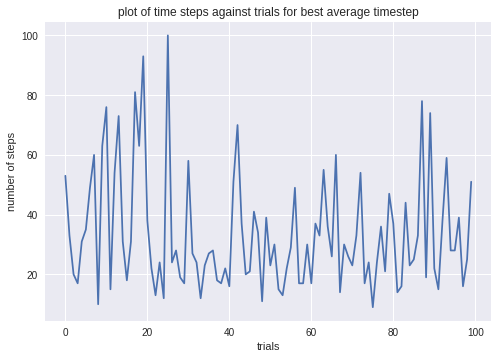

In [13]:
import matplotlib.pyplot as plt
import numpy as np
def run(env, total_episode):
    '''this is a function to update parameters using the policy gradient method (REINFORCE algorithm) and perform
    100 episodes of normal run for the program to see if the average time step is more than 195'''
    total_reward = 0 #to record the total reward after all training
    alpha = 0.01 #learning rate
    max_steps= 0 #the highest average return of the test run after each episode
    parameter = np.random.rand(4)  # random numbers between 0 and 1 (sometimes set to all zeroes)
    totreward = np.arange(0, total_episode) #track the reward return after each episode
    max_time = 250 # maximum allowed time step
    test_run_episode = 100  # total run for the test run after each episode training
    vec = np.arange(0, test_run_episode) #record the trajectory taken for test run that have highest time step returned
    final_p = np.zeros(4) #initialise the final parameters set being output
    for i_episode in range(total_episode):
        observation = env.reset() #reset the environment after each episode
        treward = 0 #initialise total reward
        parameter_delta = np.zeros(4)
        for _ in range(max_time):
            sigmoid = 1/(1+ np.exp(-np.dot(parameter,observation))) #the sigmoid policy implemented in this problem
            action = np.random.choice([1,0],p=[sigmoid,1-sigmoid]) #choose left action with probability sigmoid and right with probability 1 - sigmoid
            if  action == 1:
                parameter_delta += (1 - sigmoid) * observation * treward #update the parameter but not changing the parameter used
            else:
                parameter_delta -= sigmoid * observation *treward
            observation, reward, done, info = env.step(action) #perform the action

            treward += reward #accumulate reward

            #if reward == 0 or _ >= max_time-1: #break the loop for null reward or timestep exceed max step
            if done:
                total_reward += treward #add the reward of each episode
                totreward[i_episode] = treward #record the trajectory
                break

        parameter += alpha * parameter_delta  #update the parameter after each episode
        steps, trajectory = episoderun(env, test_run_episode, parameter) #perform test run on new parameter
        if steps > max_steps:
            maxiter = i_episode #record the episode which max average time step on test run is achieved
            final_p = parameter #record the final parameter
            max_steps = steps #maximum timestep
            vec = trajectory #record the trajctory
            print('At iteration {}, average of {} steps is obtained out of 100 trials.'.format(maxiter, steps))
        elif steps >= 195: #break the loop if the time step exceed 195
            maxiter = i_episode
            final_p = parameter
            break

    return maxiter , final_p , max_steps, vec, totreward

def episoderun(env, total_episode, parameter):
    '''run the environment using some inputted parameter and according to sigmoid policy to choose the actions'''
    total_reward = 0
    vector = np.arange(0, total_episode)
    for i_episode in range(total_episode):
        observation = env.reset()
        treward = 0
        for _ in range(250):
            sigmoid = 1/(1+ np.exp(-np.dot(parameter,observation)))
            action = np.random.choice([1,0],p=[sigmoid,1-sigmoid])
            observation, reward, done, info = env.step(action)
            #print(reward)
            #env.render() #print the animation if needed

            treward += reward

            #if reward == 0 or _ >= 249 :
            if done:
                vector[i_episode] = treward
                total_reward += treward
                #print(treward)
                break
    average = total_reward/total_episode
    return average, vector
    
#!pip install gym    
import gym
env = gym.make('CartPole-v0')

max_iteration,final_parameter,max_steps,vec,totreward = run(env,1000)
print('final parameter: {} \n with average {} steps out of 100 trials at iteration number {}.\n'.format(final_parameter,max_steps,max_iteration))
print('steps achieved each iteration:',totreward)
plt.plot(np.arange(0,100),vec) #plot the trajectory of the best test run with the best parameter
plt.xlabel('trials')
plt.ylabel('number of steps')
plt.title('plot of time steps against trials for best average timestep')
plt.show()


    
#it was observed that sometimes the steps decrease to a low level (<20) (diverge perhaps) after
#some iterations. The result obtained each time is different which shows unredictability and initial dependence